In [10]:
from linear_algebra import squared_distance, vector_mean, distance
from linear_algebra import squared_distance
import math, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [11]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [15]:
'''

class KMeans:
    'executa agrupamentos k-means'
    def __init__(self,k):
        self.k=k            #numero de agrupamentos
        self.means=None
    def classify(self,input):
        'retorna o indice do agrupamento mais proximo da entrada'
        return min(range(self.k),
        key=lambda i: squared_distance(input,self.means[i]))
    def train(self,inputs):
        'escolha pontos k aleatorios como media inicial'
        self.means=random.sample(inputs,self.k)
        assignments=None
        while True:
            'encontre novas associacoes'
            new_assignments=map(self.classify,inputs)
            'se nenhuma associacao mudou, terminamos'
            if assignments==new_assignments:
                return 
            'senao, mantenha as novas associacoes'
            assignments=new_assignments
            'compute novas medias, baseado nas novas associacoes'
            for i in range(self.k):
                'encontre todos os pontos associados ao agrupamento i'
                i_points=[p for p, a in zip(inputs,assignments) if a==i]
                
                'certifique-se que i-points nao esta vazio p' \
                'ara nao dovidir por 0'
                if i_points:
                    self.means[i]=vector_mean(i_points)'''

"\n\nclass KMeans:\n    'executa agrupamentos k-means'\n    def __init__(self,k):\n        self.k=k            #numero de agrupamentos\n        self.means=None\n    def classify(self,input):\n        'retorna o indice do agrupamento mais proximo da entrada'\n        return min(range(self.k),\n        key=lambda i: squared_distance(input,self.means[i]))\n    def train(self,inputs):\n        'escolha pontos k aleatorios como media inicial'\n        self.means=random.sample(inputs,self.k)\n        assignments=None\n        while True:\n            'encontre novas associacoes'\n            new_assignments=map(self.classify,inputs)\n            'se nenhuma associacao mudou, terminamos'\n            if assignments==new_assignments:\n                return \n            'senao, mantenha as novas associacoes'\n            assignments=new_assignments\n            'compute novas medias, baseado nas novas associacoes'\n            for i in range(self.k):\n                'encontre todos os pontos

In [22]:
class KMeans:
    """performs k-means clustering"""

    def __init__(self, k):
        self.k = k          # number of clusters
        self.means = None   # means of clusters

    def classify(self, input):
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs):

        self.means = random.sample(inputs, self.k)
        assignments = None

        while True:
            # Find new assignments
            new_assignments = list(map(self.classify, inputs))

            # If no assignments have changed, we're done.
            if assignments == new_assignments:
                return

            # Otherwise keep the new assignments,
            assignments = new_assignments

            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                # avoid divide-by-zero if i_points is empty
                if i_points:
                    self.means[i] = vector_mean(i_points)

In [37]:
random.seed(0)
clusterer=KMeans(9)
clusterer.train(inputs)
clusterer.means

[[-22.0, -12.0],
 [20.0, 26.0],
 [12.0, 14.0],
 [-42.5, 3.0],
 [-13.0, -19.0],
 [-49.0, 15.0],
 [-13.75, -5.5],
 [-9.0, -16.0],
 [26.0, 13.0]]

In [38]:
def squared_clustering_errors(inputs,k):
    'encontrar o eero ao quadrado total de k-means agrupando as entradas'
    clusterer=KMeans(k)
    clusterer.train(inputs)
    means=clusterer.means
    assignments=map(clusterer.classify,inputs)
    return sum(squared_distance(input,means[cluster])
               for input, cluster in zip(inputs, assignments))

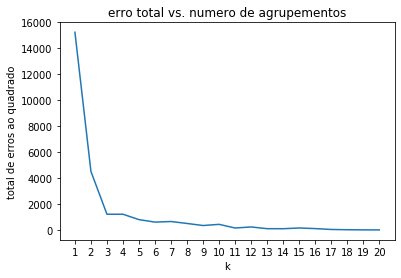

In [39]:
ks=range(1,len(inputs)+1)
errors=[squared_clustering_errors(inputs,k) for k in ks]
plt.plot(ks,errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total de erros ao quadrado")
plt.title("erro total vs. numero de agrupementos")
plt.show()